# Performance

This notebook reproduces the charts on performance of the datalab, assesing different types of data access from different locations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
home = pd.read_csv("home.csv")
hub = pd.read_csv("hub.csv")
ifca = pd.read_csv("ifca.csv")

home["location"] = "Home"
hub["location"] = "Hub"
ifca["location"] = "IFCA"

In [3]:
home["bytes_recv"] = home["bytes_recv"] / 2**20
hub["bytes_recv"] = hub["bytes_recv"] / 2**20
ifca["bytes_recv"] = ifca["bytes_recv"] / 2**20

home["throughput"] = home["bytes_recv"] / home["time"]
ifca["throughput"] = ifca["bytes_recv"] / ifca["time"]
hub["throughput"] = hub["bytes_recv"] / hub["time"]
hub.loc[hub["name"]=="local","throughput"] = (4 * 2**10) / hub[hub["name"]=="local"]["time"]

home.loc[home["name"]=="local", "name"] = "netCDF\n(~4 GiB)"
home.loc[home["name"]=="opendap-hub-compressed", "name"] = "OPeNDAP\n(deflate=True, ~5 GiB)"
home.loc[home["name"]=="opendap-hub-uncompressed", "name"] = "OPeNDAP\n(deflate=False, ~9 GiB)"

hub.loc[hub["name"]=="local", "name"] = "netCDF\n(~4 GiB)"
hub.loc[hub["name"]=="opendap-hub-compressed", "name"] = "OPeNDAP\n(deflate=True, ~5 GiB)"
hub.loc[hub["name"]=="opendap-hub-uncompressed", "name"] = "OPeNDAP\n(deflate=False, ~9 GiB)"

ifca.loc[ifca["name"]=="local", "name"] = "netCDF\n(~4 GiB)"
ifca.loc[ifca["name"]=="opendap-hub-compressed", "name"] = "OPeNDAP\n(deflate=True, ~5 GiB)"
ifca.loc[ifca["name"]=="opendap-hub-uncompressed", "name"] = "OPeNDAP\n(deflate=False, ~9 GiB)"

In [4]:
home_mean = home[["name", "workers", "location", "time", "bytes_recv", "throughput"]].groupby(["location", "name", "workers"]).agg(["mean", "std", "max", "min"])
hub_mean = hub[["name", "workers", "location", "time", "bytes_recv", "throughput"]].groupby(["location", "name", "workers"]).agg(["mean", "std", "max", "min"])
ifca_mean = ifca[["name", "workers", "location", "time", "bytes_recv", "throughput"]].groupby(["location", "name", "workers"]).agg(["mean", "std", "max", "min"])

In [5]:
hub_mean

time             \
                                                         mean        std   
location name                             workers                          
Hub      OPeNDAP\n(deflate=False, ~9 GiB) 1        367.383602   6.280285   
                                          2        206.294219   6.027090   
                                          4        172.755930   0.762248   
                                          8        170.311271   0.399280   
         OPeNDAP\n(deflate=True, ~5 GiB)  1        424.973428   5.020363   
                                          2        223.827781   1.668562   
                                          4        140.778761   9.811114   
                                          8        144.677973   0.811336   
         netCDF\n(~4 GiB)                 1        161.414160   4.863761   
                                          2         95.260008  33.430273   
                                          4         51.643073   0.426126   
                                          8         44.617325   0.717037   

                                                                           \
                                                          max         min   
location name                             workers                           
Hub      OPeNDAP\n(deflate=False, ~9 GiB) 1        373.655199  357.845374   
                                          2        212.558041  197.616004   
                                          4        173.725450  171.956402   
                                          8        170.799063  169.815170   
         OPeNDAP\n(deflate=True, ~5 GiB)  1        433.838619  421.417547   
                                          2        226.177805  221.916093   
                                          4        158.258454  134.947929   
                                          8        145.392792  143.376672   
         netCDF\n(~4 GiB)                 1        165.716213  154.917316   
                                          2        154.941419   77.838916   
                                          4         51.962673   50.920103   
                                          8         45.857624   44.079535   

                                                    bytes_recv            \
                                                          mean       std   
location name                             workers                          
Hub      OPeNDAP\n(deflate=False, ~9 GiB) 1        8881.388627  0.413608   
                                          2        8878.220477  0.719119   
                                          4        8901.498359  0.638897   
                                          8        8933.127763  1.309849   
         OPeNDAP\n(deflate=True, ~5 GiB)  1        4965.780391  1.512111   
                                          2        4958.721498  0.293775   
                                          4        4941.147411  2.033283   
                                          8        4958.733285  0.239112   
         netCDF\n(~4 GiB)                 1           0.080183  0.096586   
                                          2           0.018861  0.006107   
                                          4           0.015653  0.011954   
                                          8           0.010016  0.002780   

                                                                             \
                                                           max          min   
location name                             workers                             
Hub      OPeNDAP\n(deflate=False, ~9 GiB) 1        8881.810646  8880.816315   
                                          2        8879.033312  8877.078166   
                                          4        8902.498164  8900.931530   
                                          8        8935.058685  8931.423159   
         OPeNDAP\n(deflate=True, ~5 GiB)  1        4967.420799  49

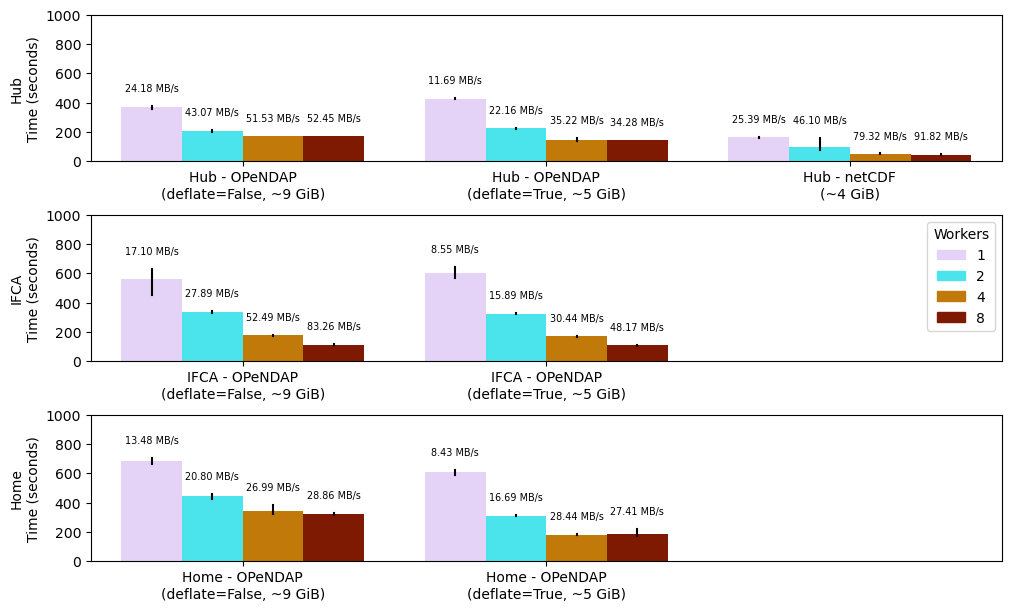

In [6]:
fig, axes = plt.subplots(3, 1, layout='constrained', figsize=(10, 6), sharey=False)

workers = [1, 2, 4, 8]
workers_colors = ["#E4D2F7", "#4BE4ED", "#C17909", "#7D1A01"]
workers_color_dict = dict(zip(workers, workers_colors))

time_means = hub_mean[("time", "mean")].values
time_workers = hub_mean[("time", "mean")].index.get_level_values("workers")

axes[0].bar(
    [0,1,2,3] + [5,6,7,8] + [10,11,12,13],
    time_means,
    color = time_workers.map(workers_color_dict).values,
    width=1)

axes[0].set_xticks(
    [1.5, 6.5, 11.5], [" - ".join([a,b]) for a,b,_ in hub_mean.index[::4].values])
axes[0].set_ylabel("Hub\nTime (seconds)")

for i,row in enumerate([0,1,2,3,5,6,7,8,10,11,12,13]):
    axes[0].plot([row,row], [hub_mean[("time", "min")].iloc[i], hub_mean[("time", "max")].iloc[i]], c="black")
    axes[0].text(row, hub_mean[("time", "max")].iloc[i] + 100,
                 f"{hub_mean[('throughput', 'mean')].iloc[i]:.2f} MB/s",
                 ha="center", size="x-small")

time_means = home_mean[("time", "mean")].values
time_workers = home_mean[("time", "mean")].index.get_level_values("workers")

axes[2].bar(
    [0,1,2,3] + [5,6,7,8],
    time_means,
    color = time_workers.map(workers_color_dict).values,
    width=1)

axes[2].set_xticks(
    [1.5,6.5], [" - ".join([a,b]) for a,b,_ in home_mean.index[::4].values])
axes[2].set_ylabel("Home\nTime (seconds)")

for i,row in enumerate([0,1,2,3,5,6,7,8]):
    axes[2].plot([row,row], [home_mean[("time", "min")].iloc[i], home_mean[("time", "max")].iloc[i]], c="black")
    if i < 8:
        axes[2].text(row, home_mean[("time", "max")].iloc[i] + 100,
                     f"{home_mean[('throughput', 'mean')].iloc[i]:.2f} MB/s",
                     ha="center", size="x-small")

time_means = ifca_mean[("time", "mean")].values
time_workers = ifca_mean[("time", "mean")].index.get_level_values("workers")

axes[1].bar(
    [0,1,2,3] + [5,6,7,8],
    time_means,
    color = time_workers.map(workers_color_dict).values,
    width=1)

axes[1].set_xticks(
    [1.5,6.5], [" - ".join([a,b]) for a,b,_ in ifca_mean.index[::4].values])
axes[1].set_ylabel("IFCA\nTime (seconds)")

for i,row in enumerate([0,1,2,3,5,6,7,8]):
    axes[1].plot([row,row], [ifca_mean[("time", "min")].iloc[i], ifca_mean[("time", "max")].iloc[i]], c="black")
    if i < 8:
        axes[1].text(row, ifca_mean[("time", "max")].iloc[i] + 100,
                     f"{ifca_mean[('throughput', 'mean')].iloc[i]:.2f} MB/s",
                     ha="center", size="x-small")

axes[1].legend(handles=[plt.Rectangle((0,0),1,1, color=workers_color_dict[label]) for label in workers], labels=workers, title="Workers")
axes[0].set_xlim(-1, 14)
axes[1].set_xlim(-1, 14)
axes[2].set_xlim(-1, 14)
axes[0].set_ylim(0, 1000)
axes[1].set_ylim(0, 1000)
axes[2].set_ylim(0, 1000)
    
plt.savefig("performance.svg")

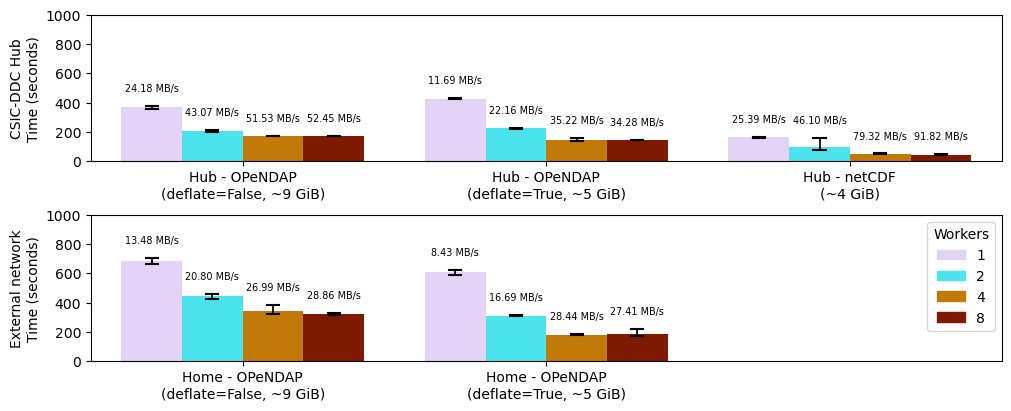

In [28]:
fig, axes = plt.subplots(2, 1, layout='constrained', figsize=(10, 4), sharey=False)

workers = [1, 2, 4, 8]
workers_colors = ["#E4D2F7", "#4BE4ED", "#C17909", "#7D1A01"]
workers_color_dict = dict(zip(workers, workers_colors))

time_means = hub_mean[("time", "mean")].values
time_workers = hub_mean[("time", "mean")].index.get_level_values("workers")

bar_width = 0.1

axes[0].bar(
    [0,1,2,3] + [5,6,7,8] + [10,11,12,13],
    time_means,
    color = time_workers.map(workers_color_dict).values,
    width=1)

axes[0].set_xticks(
    [1.5, 6.5, 11.5], [" - ".join([a,b]) for a,b,_ in hub_mean.index[::4].values])
axes[0].set_ylabel("CSIC-DDC Hub\nTime (seconds)")

for i,row in enumerate([0,1,2,3,5,6,7,8,10,11,12,13]):
    axes[0].plot([row,row], [hub_mean[("time", "min")].iloc[i], hub_mean[("time", "max")].iloc[i]], c="black", lw=1.25)

    # Add horizontal bars at the top and bottom
    axes[0].plot([row - bar_width, row + bar_width], 
                 [hub_mean[("time", "min")].iloc[i], hub_mean[("time", "min")].iloc[i]], 
                 c="black")  # Bottom bar
    axes[0].plot([row - bar_width, row + bar_width], 
                 [hub_mean[("time", "max")].iloc[i], hub_mean[("time", "max")].iloc[i]], 
                 c="black")  # Top bar
    
    axes[0].text(row, hub_mean[("time", "max")].iloc[i] + 100,
                 f"{hub_mean[('throughput', 'mean')].iloc[i]:.2f} MB/s",
                 ha="center", size="x-small")

time_means = home_mean[("time", "mean")].values
time_workers = home_mean[("time", "mean")].index.get_level_values("workers")

axes[1].bar(
    [0,1,2,3] + [5,6,7,8],
    time_means,
    color = time_workers.map(workers_color_dict).values,
    width=1)

axes[1].set_xticks(
    [1.5,6.5], [" - ".join([a,b]) for a,b,_ in home_mean.index[::4].values])
axes[1].set_ylabel("External network\nTime (seconds)")

for i,row in enumerate([0,1,2,3,5,6,7,8]):
    axes[1].plot([row,row], [home_mean[("time", "min")].iloc[i], home_mean[("time", "max")].iloc[i]], c="black", lw=1.25)
    if i < 8:
        axes[1].text(row, home_mean[("time", "max")].iloc[i] + 100,
                     f"{home_mean[('throughput', 'mean')].iloc[i]:.2f} MB/s",
                     ha="center", size="x-small")

        # Add horizontal bars at the top and bottom
        axes[1].plot([row - bar_width, row + bar_width], 
                     [home_mean[("time", "min")].iloc[i], home_mean[("time", "min")].iloc[i]], 
                     c="black")  # Bottom bar
        axes[1].plot([row - bar_width, row + bar_width], 
                     [home_mean[("time", "max")].iloc[i], home_mean[("time", "max")].iloc[i]], 
                     c="black")  # Top bar

axes[1].legend(handles=[plt.Rectangle((0,0),1,1, color=workers_color_dict[label]) for label in workers], labels=workers, title="Workers")
axes[0].set_xlim(-1, 14)
axes[1].set_xlim(-1, 14)
axes[0].set_ylim(0, 1000)
axes[1].set_ylim(0, 1000)
    
plt.savefig("performance2.svg")